In [370]:
import pandas as pd
import seaborn as sns

btc = pd.read_csv('BitcoinValue.csv')

In [371]:
btc['Value'].value_counts()

0.0002         31
0.0004         25
0.0001         23
0.0003         21
9259.2600      19
               ..
187925.4900     1
5562.0800       1
206353.2100     1
8971.8400       1
6784.0000       1
Name: Value, Length: 7866, dtype: int64

In [372]:
btc = btc[btc.Value >1]
btc=btc.reset_index(drop=True)

In [373]:
def get_max(currency,df):
    l_values=[]
    for i,j in enumerate(df['Currency']):
        if j==currency:
            a=df.loc[i,'Value']
            l_values.append(a)
    max_list=max(l_values)
    return max_list

In [374]:
max_eur=get_max('EUR',btc)
max_usd=get_max('USD',btc)
max_ars=get_max('ARS',btc)
max_try=get_max('TRY',btc)
max_mxn=get_max('MXN',btc)
max_jpy=get_max('JPY',btc)
max_rub=get_max('RUB',btc)

In [375]:
def get_min(currency,df):
    l_values=[]
    for i,j in enumerate(df['Currency']):
        if j==currency:
            a=df.loc[i,'Value']
            l_values.append(a)
    min_list=min(l_values)
    return min_list

In [376]:
min_eur=get_min('EUR',btc)
min_usd=get_min('USD',btc)
min_ars=get_min('ARS',btc)
min_try=get_min('TRY',btc)
min_mxn=get_min('MXN',btc)
min_jpy=get_min('JPY',btc)
min_rub=get_min('RUB',btc)

In [377]:
def one_day_month(df):
    l_drop=[]
    for i,j in enumerate(df['Date']):
        if j[-2:]!='23':
            l_drop.append(i)
    df=df.drop(l_drop).reset_index(drop=True)
    return df
    

In [378]:
btc_new=one_day_month(btc)

In [379]:
btc_new

,Date,Value,Currency
0,2020-01-23,7573.03,EUR
1,2020-02-23,9128.42,EUR
2,2020-03-23,5994.04,EUR
3,2020-04-23,6852.59,EUR
4,2020-06-23,8524.52,EUR
...,...,...,...
287,2017-05-23,273733.50,JPY
288,2017-07-23,306477.90,JPY
289,2017-08-23,469439.66,JPY
290,2017-10-23,626187.85,JPY


In [380]:
btc = btc.sort_values(by=['Date'])
btc_new = btc_new.sort_values(by=['Date'])

In [381]:
btc = btc.reset_index(drop=True)
btc_new = btc_new.reset_index(drop=True)

<AxesSubplot:xlabel='Date', ylabel='Value'>

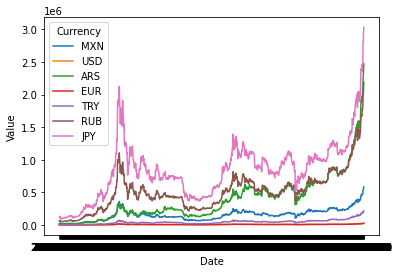

In [382]:
sns.lineplot(x='Date', y="Value",hue='Currency',data=btc)

<AxesSubplot:ylabel='Value'>

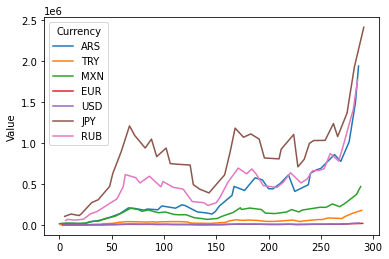

In [383]:
sns.lineplot(x=btc_new.index.tolist(), y="Value",hue='Currency',data=btc_new)

In [384]:
def normalize_min(df):
    for i,j in enumerate(df['Value']):
        if df.loc[i,'Currency']=='EUR':
            df.loc[i,'Value Normalized']=j/min_eur
        elif df.loc[i,'Currency']=='USD':
            df.loc[i,'Value Normalized']=j/min_usd
        elif df.loc[i,'Currency']=='ARS':
            df.loc[i,'Value Normalized']=j/min_ars
        elif df.loc[i,'Currency']=='TRY':
            df.loc[i,'Value Normalized']=j/min_try
        elif df.loc[i,'Currency']=='JPY':
            df.loc[i,'Value Normalized']=j/min_jpy
        elif df.loc[i,'Currency']=='MXN':
            df.loc[i,'Value Normalized']=j/min_mxn
        else:
            df.loc[i,'Value Normalized']=j/min_rub
    return df
            

In [385]:
norm_max_btc=normalize_max(btc)
norm_min_btc=normalize_min(btc)

<AxesSubplot:xlabel='Date', ylabel='Value Normalized'>

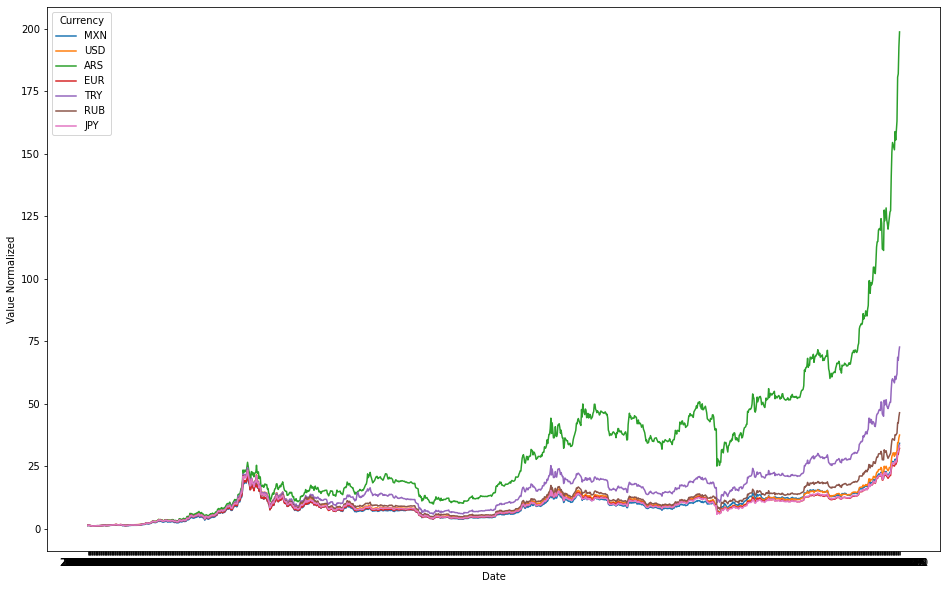

In [386]:
from matplotlib import pyplot
fig_dims = (16, 10)
fig, ax = pyplot.subplots(figsize=fig_dims)

sns.lineplot(x='Date', y="Value Normalized",hue='Currency',ax=ax,data=norm_min_btc)

In [387]:
norm_min_btc2 = norm_min_btc[norm_min_btc['Currency'] != 'ARS']

<AxesSubplot:xlabel='Date', ylabel='Value Normalized'>

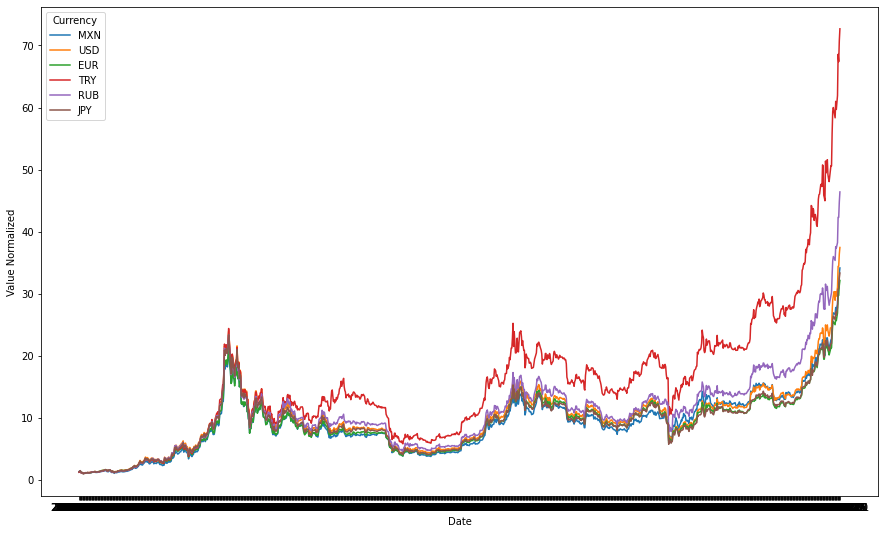

In [388]:
fig_dims = (15, 9)
fig, ax = pyplot.subplots(figsize=fig_dims)

sns.lineplot(x='Date', y="Value Normalized",hue='Currency',ax=ax,data=norm_min_btc2)

In [391]:
norm_min_btc3 = norm_min_btc2[norm_min_btc2['Currency'] != 'TRY']


<AxesSubplot:xlabel='Date', ylabel='Value Normalized'>

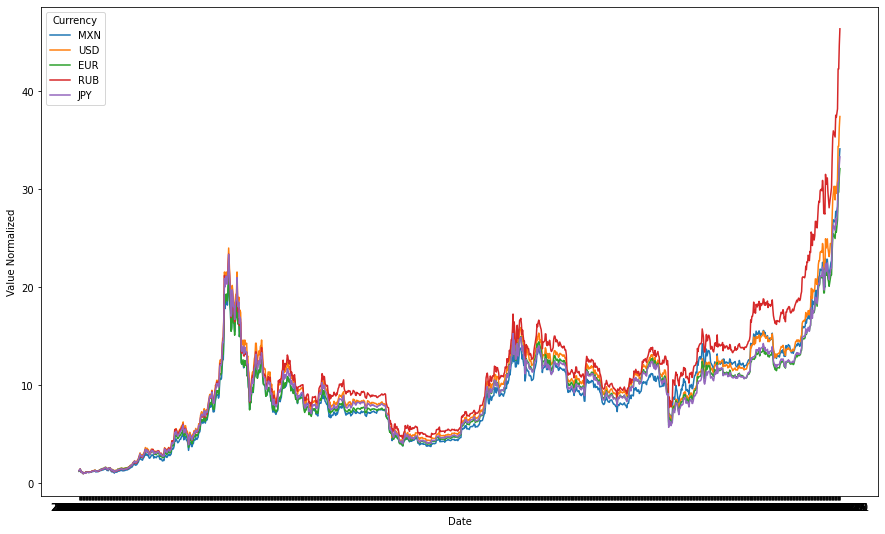

In [393]:
fig_dims = (15, 9)
fig, ax = pyplot.subplots(figsize=fig_dims)

sns.lineplot(x='Date', y="Value Normalized",hue='Currency',ax=ax,data=norm_min_btc3)

In [365]:
norm_min_btc4 = norm_min_btc3[norm_min_btc3['Currency'] != 'RUB']
norm_min_btc_pre = norm_min_btc4[norm_min_btc4['Currency'] != 'MXN']
norm_min_btc_last = norm_min_btc_pre[norm_min_btc_pre['Currency'] != 'JPY']

<AxesSubplot:xlabel='Date', ylabel='Value Normalized'>

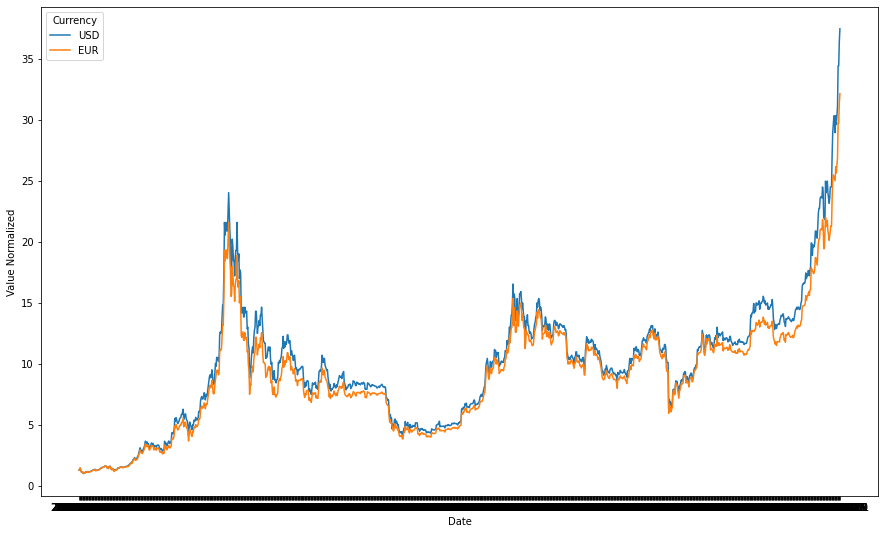

In [366]:
fig_dims = (15, 9)
fig, ax = pyplot.subplots(figsize=fig_dims)

sns.lineplot(x='Date', y="Value Normalized",hue='Currency',ax=ax,data=norm_min_btc_last)